knn

In [ ]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [18]:
TRAIN_DIR = 'CIFAR-10-images-master/train'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [19]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append([img_arr, class_num])
print(len(TRAIN_DATA))

100%|██████████| 5000/5000 [00:28<00:00, 174.16it/s]

50000


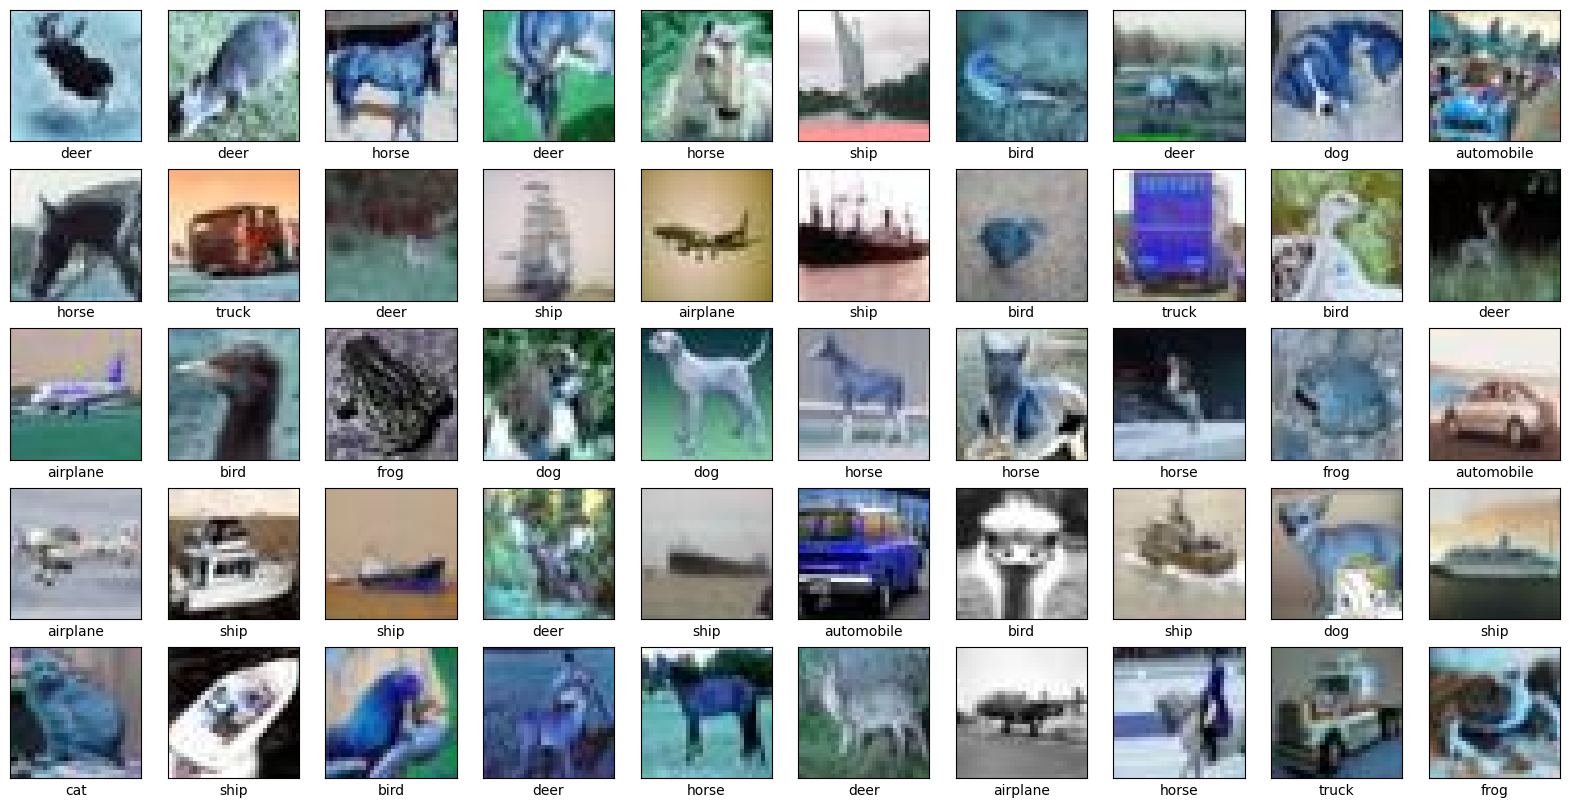

In [20]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i][0])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [21]:
f0 = TRAIN_DATA[0:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

In [22]:
def most_frequent(List):
    counter = 0
    num = List[0][1]
    curr_frequency = 0 
    for i in List:
        for j in List:
            if i[1] == j[1]:
                curr_frequency = curr_frequency + 1
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
    return num

def calculate_l1_accuracy(train, validation, k):
    accurate_prediction = 0
    for v in validation:
        validation_label = v[1]
        l1_distance = []
        for t in train:
            l1_distance.append([np.sum(t[0] - v[0]), t[1]])
        l1_distance.sort()
        k_l1_distance = []
        for i in range(k):
            k_l1_distance.append(l1_distance[i])
        
        most_frequent_k_l1_distance = most_frequent(k_l1_distance)
        if most_frequent_k_l1_distance[1] == validation_label:
            accurate_prediction = accurate_prediction + 1
    return accurate_prediction/len(validation)

scores = []
value_of_k = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
for k in value_of_k:
    for i in range(5):
        if i==0:
            train = f1+f2+f3+f4
            validation = f0
            score = calculate_l1_accuracy(train, validation, k)
            scores.append([k, i, score])    
        elif i==1:
            train = f0+f2+f3+f4
            validation = f1
            score = calculate_l1_accuracy(train, validation, k)
            scores.append([k, i, score])
        elif i==2:
            train = f1+f0+f3+f4
            validation = f2
            score = calculate_l1_accuracy(train, validation, k)
            
            scores.append([k, i, score])
        elif i==3:
            train = f1+f2+f0+f4
            validation = f3
            score = calculate_l1_accuracy(train, validation, k)
            
            scores.append([k, i, score])
        elif i==4:
            train = f1+f2+f3+f0
            validation = f4
            score = calculate_l1_accuracy(train, validation, k)
            scores.append([k, i, score])

In [23]:
print(scores)

[[1, 0, 0.201], [1, 1, 0.172], [1, 2, 0.191], [1, 3, 0.187], [1, 4, 0.185], [3, 0, 0.18], [3, 1, 0.176], [3, 2, 0.187], [3, 3, 0.174], [3, 4, 0.18], [5, 0, 0.169], [5, 1, 0.191], [5, 2, 0.171], [5, 3, 0.173], [5, 4, 0.167], [7, 0, 0.178], [7, 1, 0.162], [7, 2, 0.161], [7, 3, 0.193], [7, 4, 0.17], [9, 0, 0.181], [9, 1, 0.182], [9, 2, 0.135], [9, 3, 0.169], [9, 4, 0.149], [11, 0, 0.179], [11, 1, 0.142], [11, 2, 0.164], [11, 3, 0.167], [11, 4, 0.155], [13, 0, 0.176], [13, 1, 0.146], [13, 2, 0.149], [13, 3, 0.149], [13, 4, 0.154], [15, 0, 0.164], [15, 1, 0.141], [15, 2, 0.15], [15, 3, 0.155], [15, 4, 0.153], [17, 0, 0.166], [17, 1, 0.158], [17, 2, 0.159], [17, 3, 0.153], [17, 4, 0.159], [19, 0, 0.172], [19, 1, 0.158], [19, 2, 0.163], [19, 3, 0.155], [19, 4, 0.145]]


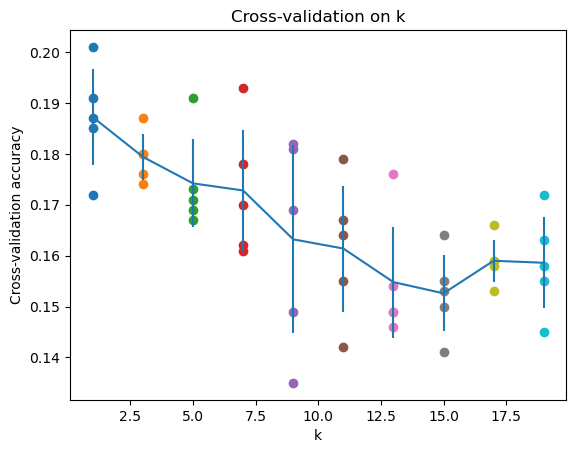

In [24]:
k_to_accuracies = {}
for k in value_of_k:
    k_to_accuracies[k] = []
for k in value_of_k:
    for score in scores:
        if(score[0] == k):
            k_to_accuracies[k].append(score[2])           
for k in value_of_k:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(value_of_k, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [25]:
def calculate_l2_accuracy(train, validation, k):
    accurate_prediction = 0
    for v in validation:
        validation_label = v[1]
        l2_distance = []
        for t in train:
            l2_distance.append([np.sqrt(np.sum((t[0] - v[0])**2)), t[1]])
        l2_distance.sort()
        k_l2_distance = []
        for i in range(k):
            k_l2_distance.append(l2_distance[i])
        
        most_frequent_k_l2_distance = most_frequent(k_l2_distance)
        if most_frequent_k_l2_distance[1] == validation_label:
            accurate_prediction = accurate_prediction + 1
    return accurate_prediction/len(validation)

l2_scores = []
for k in value_of_k:
    for i in range(5):
        if i==0:
            train = f1+f2+f3+f4
            validation = f0
            score = calculate_l2_accuracy(train, validation, k)
            l2_scores.append([k, i, score])    
        elif i==1:
            train = f0+f2+f3+f4
            validation = f1
            score = calculate_l2_accuracy(train, validation, k)
            l2_scores.append([k, i, score])
        elif i==2:
            train = f1+f0+f3+f4
            validation = f2
            score = calculate_l2_accuracy(train, validation, k)
            
            l2_scores.append([k, i, score])
        elif i==3:
            train = f1+f2+f0+f4
            validation = f3
            score = calculate_l2_accuracy(train, validation, k)
            
            l2_scores.append([k, i, score])
        elif i==4:
            train = f1+f2+f3+f0
            validation = f4
            score = calculate_l2_accuracy(train, validation, k)
            l2_scores.append([k, i, score])

In [26]:
print(l2_scores)

[[1, 0, 0.194], [1, 1, 0.203], [1, 2, 0.186], [1, 3, 0.191], [1, 4, 0.175], [3, 0, 0.169], [3, 1, 0.175], [3, 2, 0.165], [3, 3, 0.182], [3, 4, 0.156], [5, 0, 0.151], [5, 1, 0.149], [5, 2, 0.172], [5, 3, 0.155], [5, 4, 0.163], [7, 0, 0.17], [7, 1, 0.153], [7, 2, 0.153], [7, 3, 0.152], [7, 4, 0.144], [9, 0, 0.163], [9, 1, 0.133], [9, 2, 0.146], [9, 3, 0.145], [9, 4, 0.173], [11, 0, 0.142], [11, 1, 0.156], [11, 2, 0.147], [11, 3, 0.174], [11, 4, 0.157], [13, 0, 0.167], [13, 1, 0.14], [13, 2, 0.162], [13, 3, 0.147], [13, 4, 0.145], [15, 0, 0.154], [15, 1, 0.141], [15, 2, 0.146], [15, 3, 0.165], [15, 4, 0.146], [17, 0, 0.129], [17, 1, 0.138], [17, 2, 0.13], [17, 3, 0.146], [17, 4, 0.155], [19, 0, 0.156], [19, 1, 0.151], [19, 2, 0.136], [19, 3, 0.149], [19, 4, 0.158]]


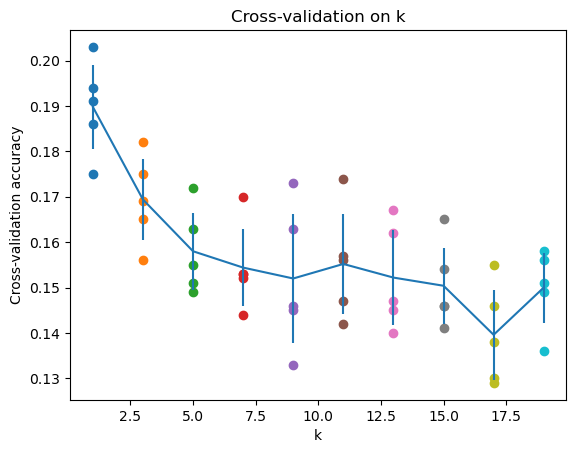

In [27]:
k_to_l2_accuracies = {}
for k in value_of_k:
    k_to_l2_accuracies[k] = []
for k in value_of_k:
    for score in l2_scores:
        if(score[0] == k):
            k_to_l2_accuracies[k].append(score[2])           
for k in value_of_k:
    accuracies = k_to_l2_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)
l2_accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_l2_accuracies.items())])
l2_accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_l2_accuracies.items())])
plt.errorbar(value_of_k, l2_accuracies_mean, yerr=l2_accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

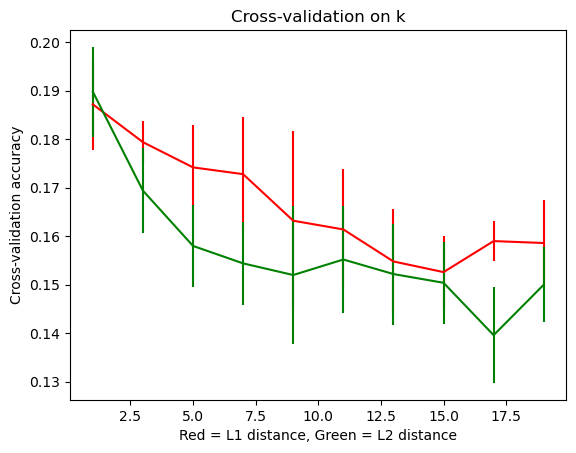

In [28]:
plt.errorbar(value_of_k, accuracies_mean, yerr=accuracies_std, color='red')
plt.errorbar(value_of_k, l2_accuracies_mean, yerr=l2_accuracies_std, color='green')
plt.title('Cross-validation on k')
plt.xlabel('Red = L1 distance, Green = L2 distance')
plt.ylabel('Cross-validation accuracy')
plt.show()